In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import terminalLogic
from terminalLogic import Algo
import client
from client import engine
import pandas as pd
import numpy as np
import datetime
import time


In [2]:
url = engine()
data = url.getData()
df = data
df.head(10)


,time,open,high,low,close,volume
0,2021-10-30 15:49:00,61385.0,61387.0,61363.0,61383.0,12386.0586
1,2021-10-30 15:50:00,61383.0,61406.0,61373.0,61399.0,67803.7588
2,2021-10-30 15:51:00,61399.0,61400.0,61362.0,61391.0,150121.0238
3,2021-10-30 15:52:00,61391.0,61401.0,61379.0,61400.0,97964.4584
4,2021-10-30 15:53:00,61400.0,61415.0,61385.0,61385.0,987151.4470
5,2021-10-30 15:54:00,61385.0,61385.0,61346.0,61354.0,172170.2618
6,2021-10-30 15:55:00,61354.0,61381.0,61352.0,61381.0,305777.6890
7,2021-10-30 15:56:00,61381.0,61388.0,61361.0,61388.0,35208.0720
8,2021-10-30 15:57:00,61388.0,61400.0,61378.0,61391.0,14740.2516
9,2021-10-30 15:58:00,61391.0,61410.0,61367.0,61391.0,274309.0837


In [3]:
df

,time,open,high,low,close,volume
0,2021-10-30 15:49:00,61385.0,61387.0,61363.0,61383.0,12386.0586
1,2021-10-30 15:50:00,61383.0,61406.0,61373.0,61399.0,67803.7588
2,2021-10-30 15:51:00,61399.0,61400.0,61362.0,61391.0,150121.0238
3,2021-10-30 15:52:00,61391.0,61401.0,61379.0,61400.0,97964.4584
4,2021-10-30 15:53:00,61400.0,61415.0,61385.0,61385.0,987151.4470
...,...,...,...,...,...,...
1495,2021-10-31 16:44:00,60620.0,60637.0,60620.0,60637.0,27446.0929
1496,2021-10-31 16:45:00,60637.0,60667.0,60593.0,60604.0,103210.5093
1497,2021-10-31 16:46:00,60604.0,60640.0,60603.0,60633.0,49525.1471
1498,2021-10-31 16:47:00,60631.0,60671.0,60631.0,60667.0,44115.8551


In [4]:
df1 = Algo.fullstate(df, df)
df1.dropna(inplace=True)
df2 = df1
df2['time'] = df2['time'].dt.date
df2

,time,open,high,low,close,volume,9-min,21-min,signal,market_returns,trend_returns,entry,ma,ratio,position,entryR,range_returns,sign
102,2021-10-30,61485.0,61487.0,61472.0,61478.0,456268.3531,61369.000000,61324.619048,1.0,-0.000114,0.001563,0.0,61369.000000,1.001776,-1.0,0.0,0.000114,1.0
103,2021-10-30,61478.0,61493.0,61469.0,61493.0,43536.6605,61383.000000,61337.095238,1.0,0.000244,-0.000114,0.0,61383.000000,1.001792,-1.0,0.0,-0.000244,1.0
104,2021-10-30,61493.0,61514.0,61491.0,61514.0,131542.8744,61399.555556,61350.000000,1.0,0.000341,0.000244,0.0,61399.555556,1.001864,-1.0,0.0,-0.000341,1.0
105,2021-10-30,61514.0,61532.0,61485.0,61489.0,857128.8457,61417.666667,61363.809524,1.0,-0.000406,0.000341,0.0,61417.666667,1.001161,-1.0,0.0,0.000406,-1.0
106,2021-10-30,61489.0,61611.0,61486.0,61560.0,437385.9498,61432.333333,61374.571429,1.0,0.001154,-0.000406,0.0,61432.333333,1.002078,-1.0,0.0,-0.001154,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2021-10-31,60620.0,60637.0,60620.0,60637.0,27446.0929,60545.888889,60506.761905,1.0,0.000280,0.000412,0.0,60545.888889,1.001505,-1.0,0.0,-0.000280,1.0
1496,2021-10-31,60637.0,60667.0,60593.0,60604.0,103210.5093,60553.444444,60521.238095,1.0,-0.000544,0.000280,0.0,60553.444444,1.000835,-1.0,0.0,0.000544,-1.0
1497,2021-10-31,60604.0,60640.0,60603.0,60633.0,49525.1471,60562.444444,60535.952381,1.0,0.000478,-0.000544,0.0,60562.444444,1.001165,-1.0,0.0,-0.000478,-1.0
1498,2021-10-31,60631.0,60671.0,60631.0,60667.0,44115.8551,60576.444444,60549.190476,1.0,0.000561,0.000478,0.0,60576.444444,1.001495,-1.0,0.0,-0.000561,1.0


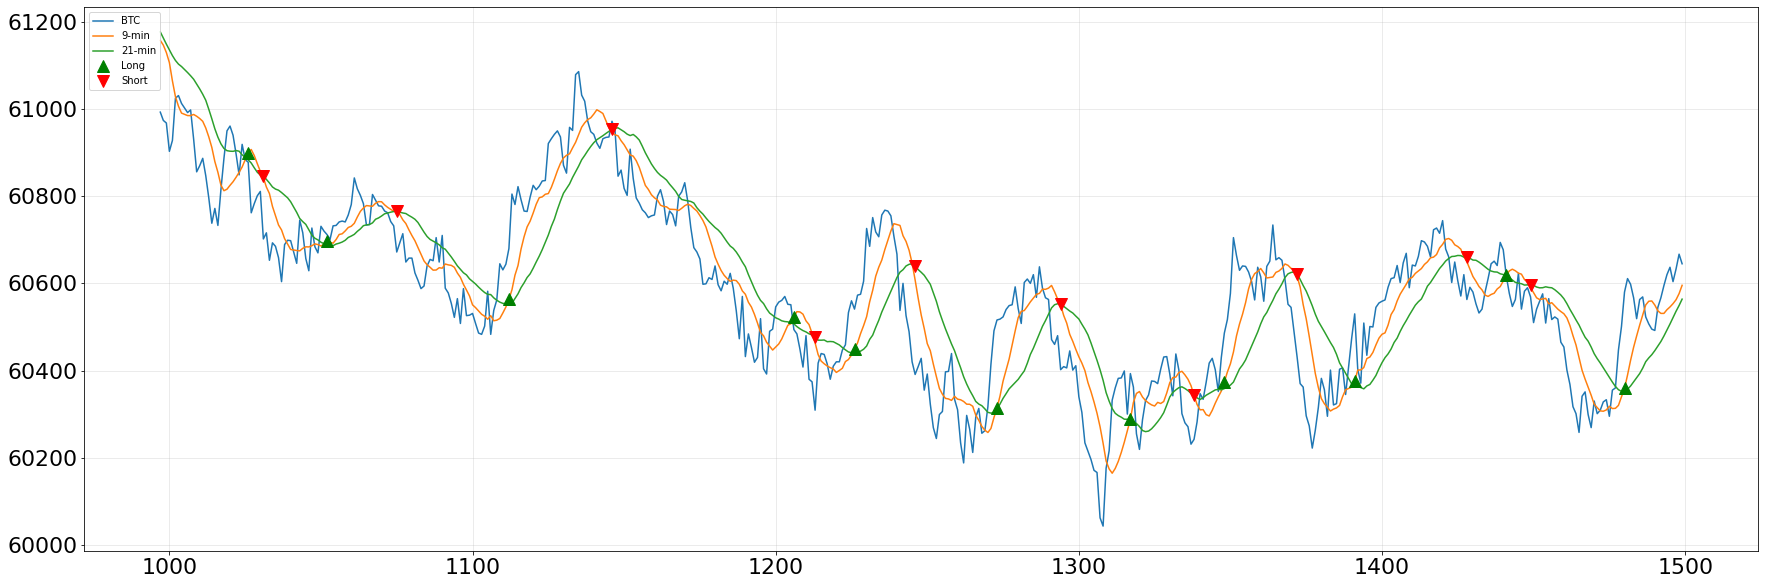

In [5]:
a = Algo.plot_positionT(df)
a

In [6]:
df2

,time,open,high,low,close,volume,9-min,21-min,signal,market_returns,trend_returns,entry,ma,ratio,position,entryR,range_returns,sign
102,2021-10-30,61485.0,61487.0,61472.0,61478.0,456268.3531,61369.000000,61324.619048,1.0,-0.000114,0.001563,0.0,61369.000000,1.001776,-1.0,0.0,0.000114,1.0
103,2021-10-30,61478.0,61493.0,61469.0,61493.0,43536.6605,61383.000000,61337.095238,1.0,0.000244,-0.000114,0.0,61383.000000,1.001792,-1.0,0.0,-0.000244,1.0
104,2021-10-30,61493.0,61514.0,61491.0,61514.0,131542.8744,61399.555556,61350.000000,1.0,0.000341,0.000244,0.0,61399.555556,1.001864,-1.0,0.0,-0.000341,1.0
105,2021-10-30,61514.0,61532.0,61485.0,61489.0,857128.8457,61417.666667,61363.809524,1.0,-0.000406,0.000341,0.0,61417.666667,1.001161,-1.0,0.0,0.000406,-1.0
106,2021-10-30,61489.0,61611.0,61486.0,61560.0,437385.9498,61432.333333,61374.571429,1.0,0.001154,-0.000406,0.0,61432.333333,1.002078,-1.0,0.0,-0.001154,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2021-10-31,60620.0,60637.0,60620.0,60637.0,27446.0929,60545.888889,60506.761905,1.0,0.000280,0.000412,0.0,60545.888889,1.001505,-1.0,0.0,-0.000280,1.0
1496,2021-10-31,60637.0,60667.0,60593.0,60604.0,103210.5093,60553.444444,60521.238095,1.0,-0.000544,0.000280,0.0,60553.444444,1.000835,-1.0,0.0,0.000544,-1.0
1497,2021-10-31,60604.0,60640.0,60603.0,60633.0,49525.1471,60562.444444,60535.952381,1.0,0.000478,-0.000544,0.0,60562.444444,1.001165,-1.0,0.0,-0.000478,-1.0
1498,2021-10-31,60631.0,60671.0,60631.0,60667.0,44115.8551,60576.444444,60549.190476,1.0,0.000561,0.000478,0.0,60576.444444,1.001495,-1.0,0.0,-0.000561,1.0


## Trend positions

<Figure size 2160x720 with 0 Axes>

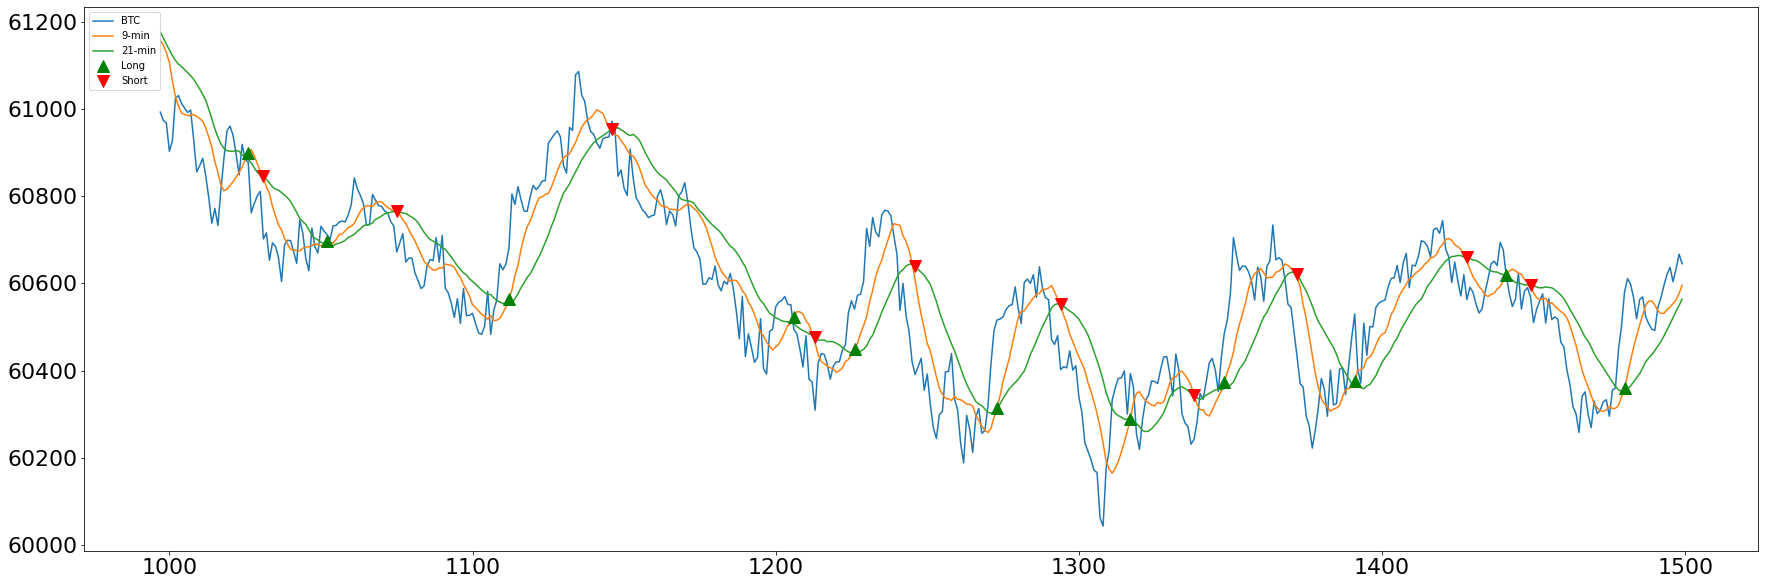

In [7]:
plt.figure(figsize=(30, 10))
fig = plt.figure(facecolor=(1, 1, 1))
y = df2.iloc[-500:]['time']
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
plt.plot(df2.iloc[-500:]['21-min'], label = '21-min')
plt.plot(df2[-500:].loc[df2.entry == 2].index, df2[-500:]['9-min'][df2.entry == 2], "^",
        color = "g", markersize = 12, label= "Long")
plt.plot(df2[-500:].loc[df2.entry == -2].index, df2[-500:]['21-min'][df2.entry == -2], "v",
        color = "r", markersize = 12, label="Short")
plt.legend(loc=2);
plt.savefig('../web/assets/trendPositions.png')

# Trend Algo Performance

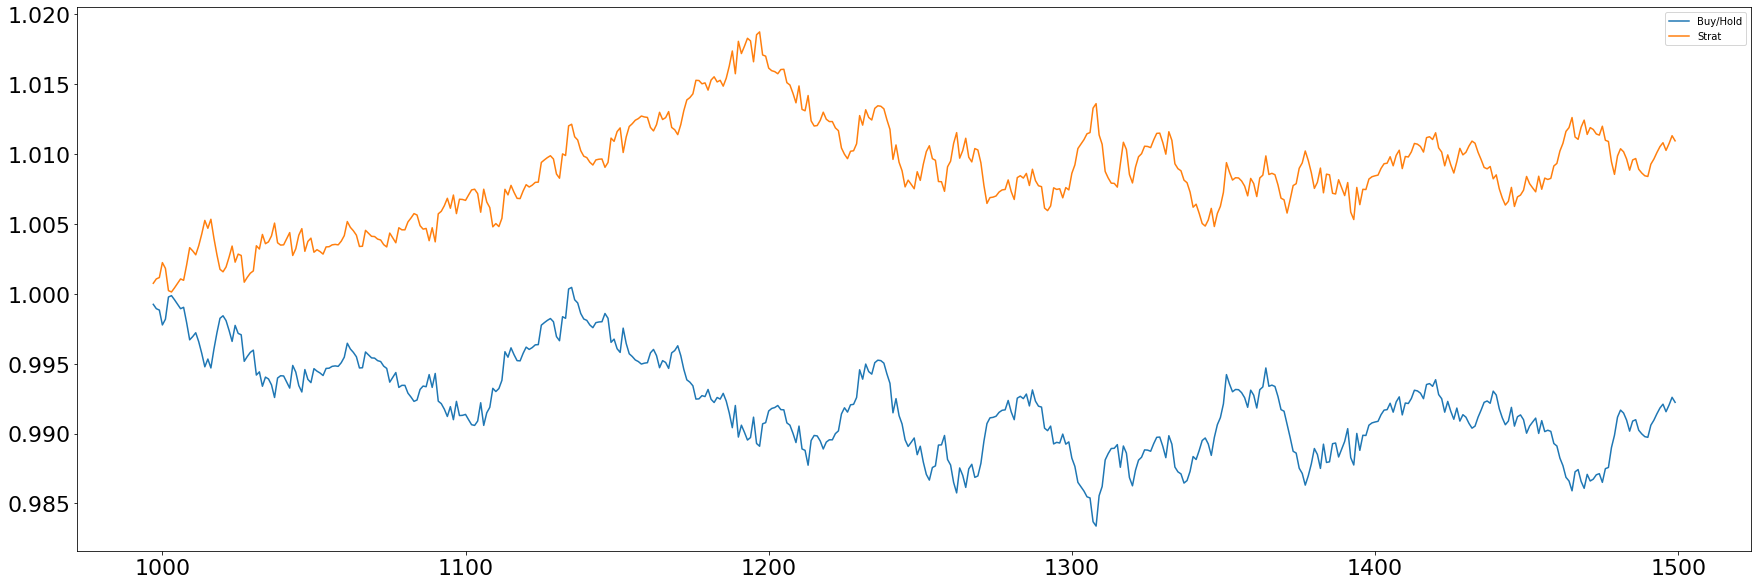

In [8]:
fig = plt.figure(facecolor=(1, 1, 1))
y=df2.iloc[-500:]['time']
df2['trend_returns'] = df2.signal * df2.market_returns
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.plot(np.exp(df2.iloc[-500:]['market_returns']).cumprod(),label = "Buy/Hold")
plt.plot(np.exp(df2.iloc[-500:]['trend_returns']).cumprod(),label = "Strat")
plt.legend()
plt.savefig('../web/assets/trendRets.png')

In [9]:
trendRets = Algo.trend_gainz(df2)
trendRets

Market Returns:  0.9865238732196989
Trend Strategy Returns:  0.9822674482045348


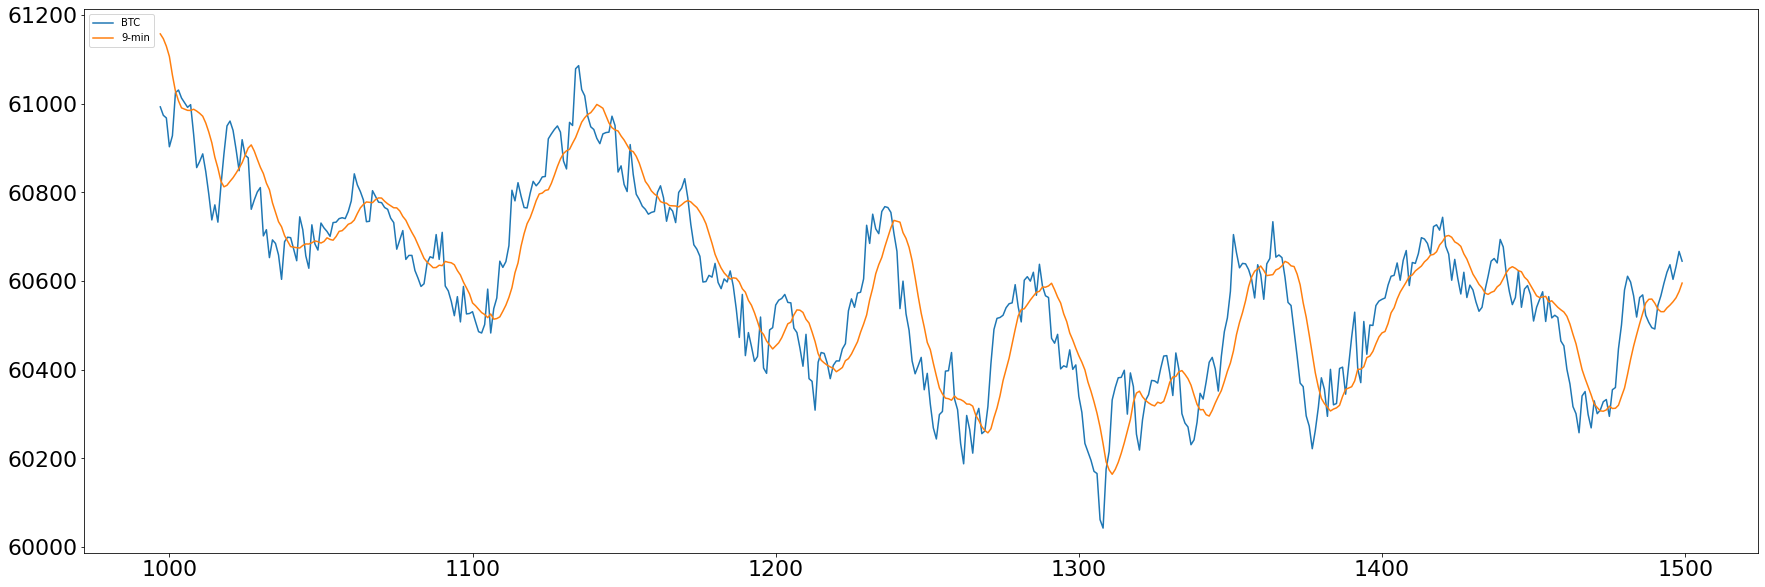

In [10]:
fig = plt.figure(facecolor=(1, 1, 1))
y=df2.iloc[-500:]['time']
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
plt.legend(loc=2);
plt.savefig('../web/assets/btc1m9ma.png')

# Range positions

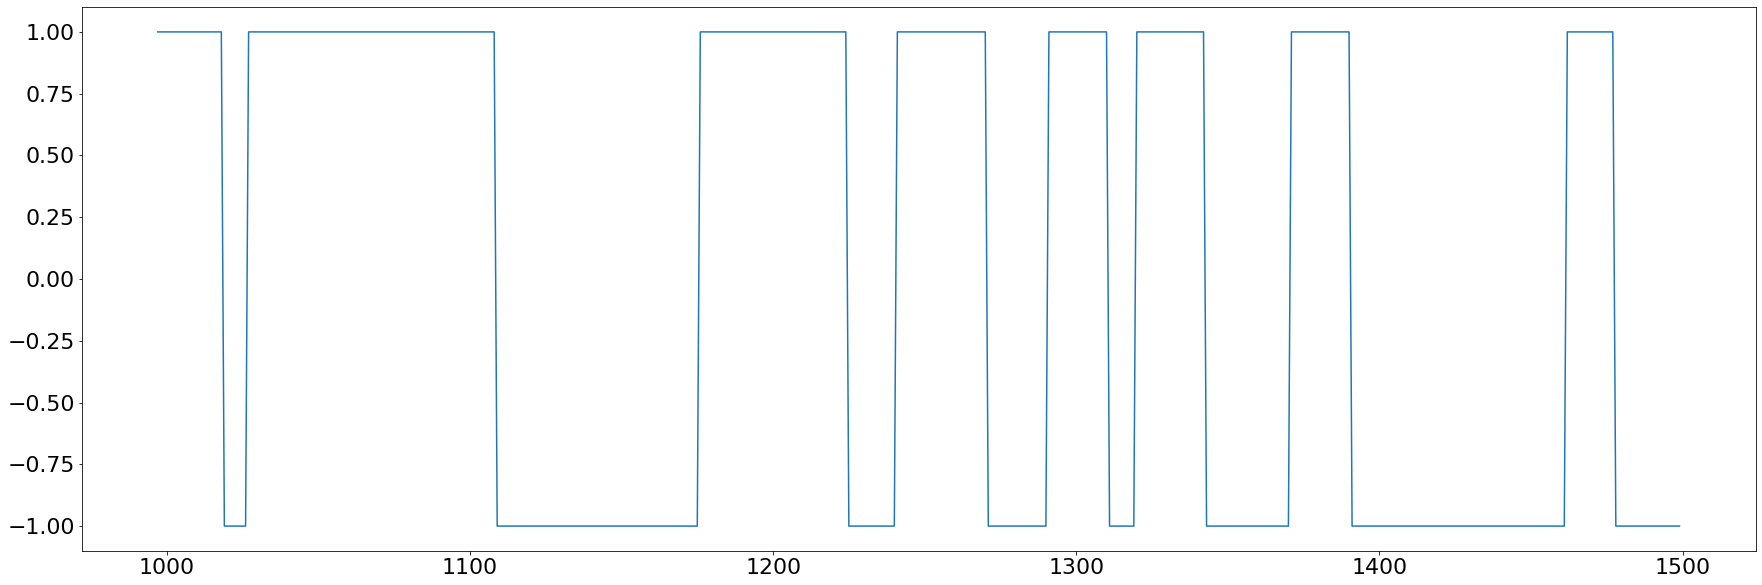

In [11]:
fig = plt.figure(facecolor=(1, 1, 1))
y=df2.iloc[-500:]['time']
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.plot(df2.iloc[-500:]['position'].dropna())
plt.savefig('../web/assets/rangeStatus.png')


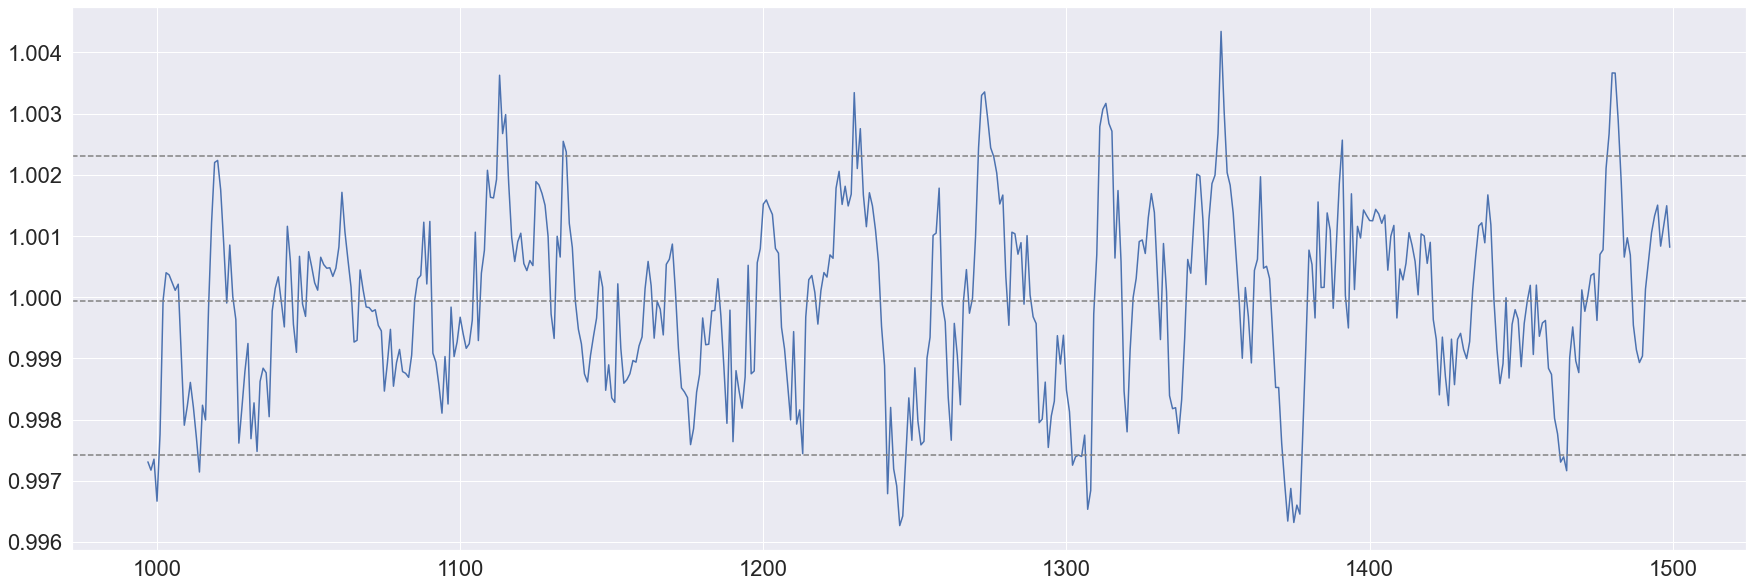

In [25]:
p = Algo.plot_percentiles(df2.tail(500))
p

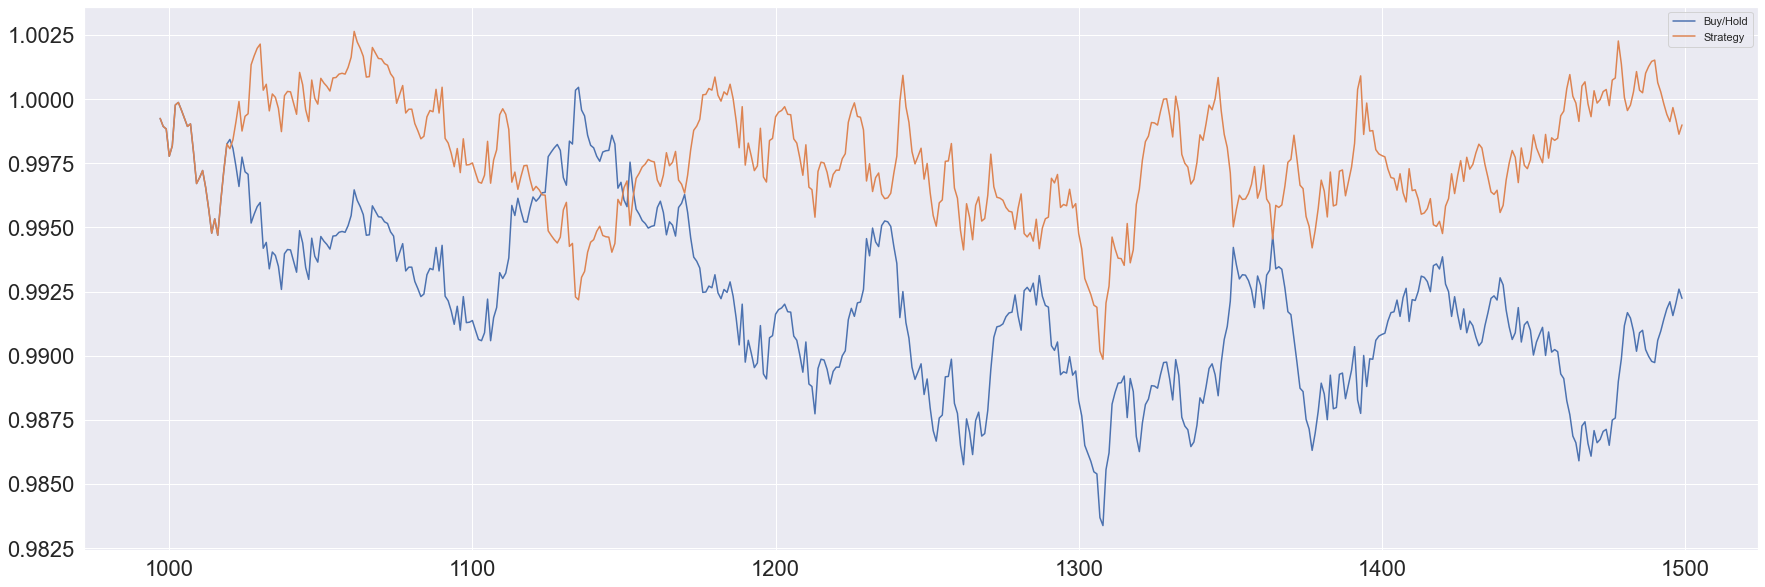

In [13]:
""" Plots returns for the range algo df thus returns 'R' """
y=df2.iloc[-500:]['time'].dropna()
fig = plt.figure(facecolor=(1, 1, 1))
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.plot(np.exp(df2.iloc[-500:]['market_returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(df2.iloc[-500:]['range_returns'].dropna()).cumprod(), label='Strategy')
plt.legend();
plt.savefig('../web/assets/rangeRets.png')

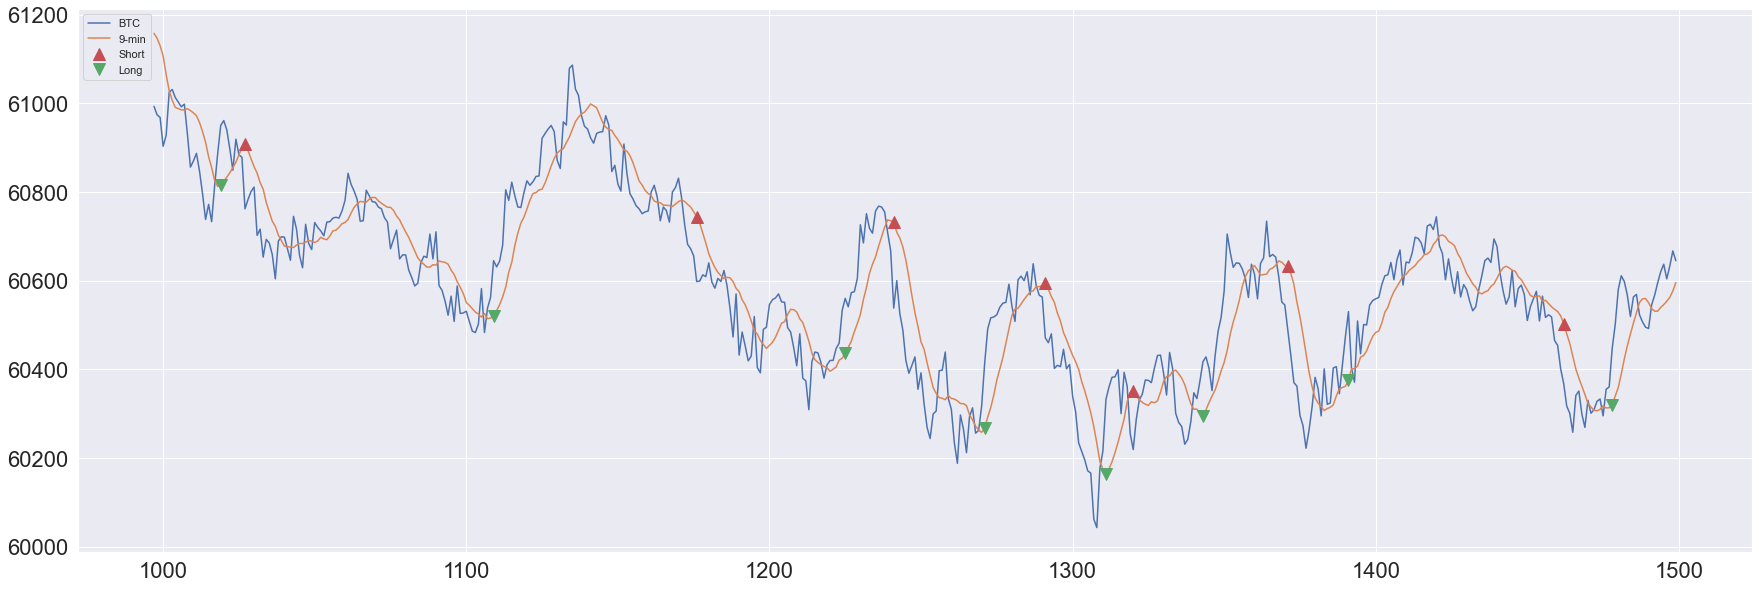

In [14]:

y=df2.iloc[-500:]['time']
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
plt.plot(df2[-500:].loc[df2.entryR == 2].index, df2[-500:]['9-min'][df2.entryR == 2], "^",
        color = "r", markersize = 12, label= "Short")
plt.plot(df2[-500:].loc[df2.entryR == -2].index, df2[-500:]['9-min'][df2.entryR == -2], "v",
        color = "g", markersize = 12, label="Long")
plt.legend(loc=2);
plt.savefig('../web/assets/dualPlot.png')


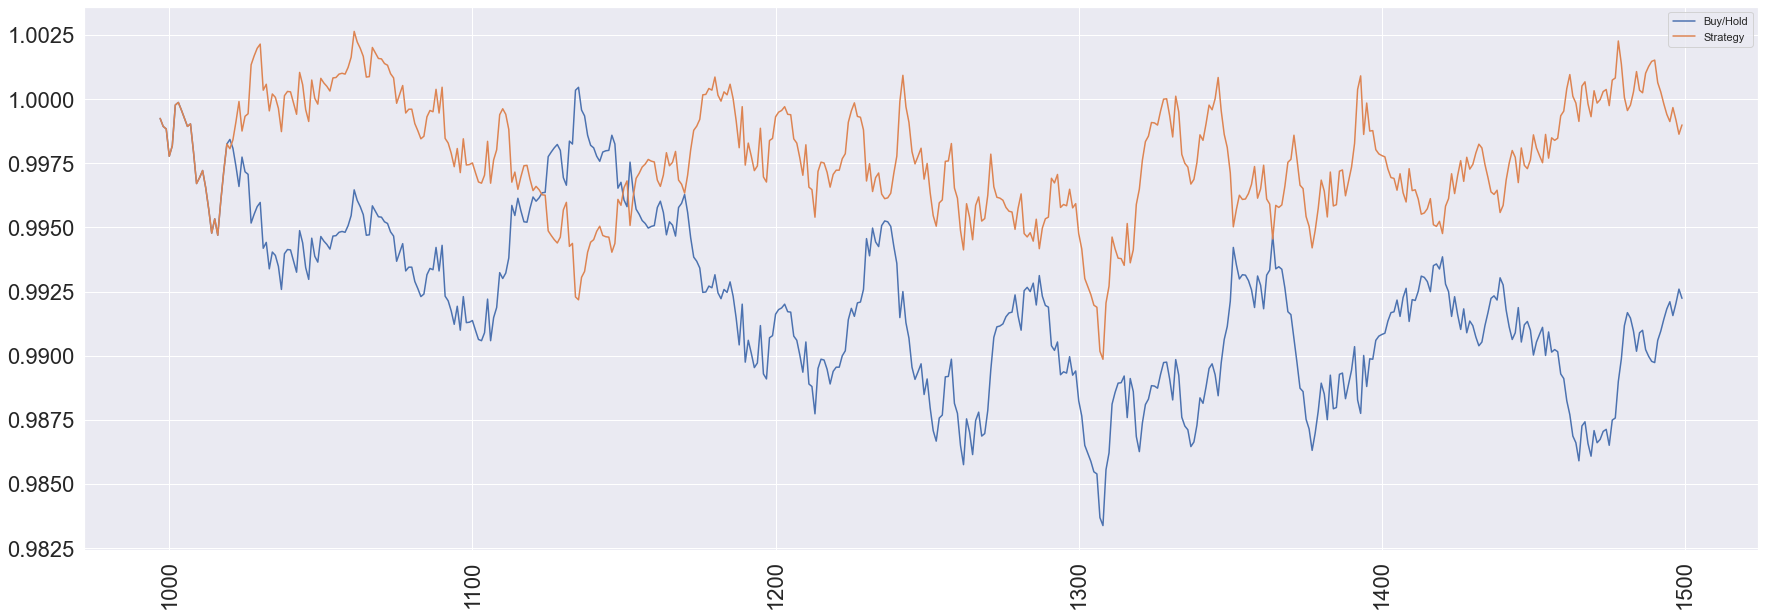

In [15]:
rangeRet = Algo.market_returnsR(df2)
rangeRet

In [16]:
rangeRets = Algo.range_gainz(df2)
rangeRets

Market Returns:  0.9865238732196989
Range Strategy Returns:  1.0159650412927272


In [17]:
bestFit = df2[['time','close', 'market_returns','range_returns', 'trend_returns']]
bestFit.head(30)

,time,close,market_returns,range_returns,trend_returns
102,2021-10-30,61478.0,-0.000114,0.000114,-0.000114
103,2021-10-30,61493.0,0.000244,-0.000244,0.000244
104,2021-10-30,61514.0,0.000341,-0.000341,0.000341
105,2021-10-30,61489.0,-0.000406,0.000406,-0.000406
106,2021-10-30,61560.0,0.001154,-0.001154,0.001154
107,2021-10-30,61510.0,-0.000813,0.000813,-0.000813
108,2021-10-30,61494.0,-0.000260,0.000260,-0.000260
109,2021-10-30,61453.0,-0.000667,0.000667,-0.000667
110,2021-10-30,61483.0,0.000488,-0.000488,0.000488
111,2021-10-30,61448.0,-0.000569,0.000569,-0.000569


* check val in each algo_return, determine greatest val, declear winner
* if declared winner, iterate forward len(X_minutes) in winner col and append new val to list
* check both val at winning location for greatest val, decleare winner
* iterate forward len(X_min) in winning col and append val to list
* repeat, i think..

In [18]:
count=[]
selectVal = []
greatestVal = []
signal = ''
period = 3

for j, k in bestFit.iterrows():
    count.append(1)    
    if len(count) == period:
        selectVal.append(["time", k['market_returns'], "rangeRet", k['range_returns'], "trendRet", k['trend_returns']])
        if k['range_returns'] > k['trend_returns']:
            signal = -1
            greatestVal.append([ signal, k['range_returns']])
#             selectVal.append([k['range_returns'], signal])
#             np.insert(winnerVal, 1, greatestVal, axis = 1)
        elif k['range_returns'] < k['trend_returns']:
            signal = 1
            greatestVal.append([signal, k['trend_returns']])
#             selectVal.append([k['trend_returns'], signal])
        else:
            k['range_returns'] == k['trend_returns']
            signal = 0
            greatestVal.append([signal, k['trend_returns']])
#             selectVal.append([k['trend_returns'], signal])
        count = []

record=np.concatenate((selectVal,greatestVal), axis=1)
record

        
df3 = pd.DataFrame((record),
                     columns=['time', 'market_returns', 'range','rangeRet', 'trend', 'trendRet', 'winningAlgo', 'winnersRets'])   
df3.drop(['range', 'trend'], axis = 1, inplace=True)
record


array([['time', '0.00034144398617996785', 'rangeRet', ...,
        '0.00034144398617996785', '1.0', '0.00034144398617996785'],
       ['time', '-0.0008125457504029043', 'rangeRet', ...,
        '-0.0008125457504029043', '-1.0', '0.0008125457504029043'],
       ['time', '0.0004880588370443917', 'rangeRet', ...,
        '0.0004880588370443917', '1.0', '0.0004880588370443917'],
       ...,
       ['time', '0.0008757653178363967', 'rangeRet', ...,
        '0.0008757653178363967', '1.0', '0.0008757653178363967'],
       ['time', '0.00041249020920552937', 'rangeRet', ...,
        '0.00041249020920552937', '1.0', '0.00041249020920552937'],
       ['time', '0.0004784018171530846', 'rangeRet', ...,
        '0.0004784018171530846', '1.0', '0.0004784018171530846']],
      dtype='<U32')

In [19]:
df3['addTrend'] = df3['trendRet'].shift(-1)
df3['addRange'] = df3['rangeRet'].shift(-1)
df3['result'] = np.where(df3['trendRet'] > df3['rangeRet'], df3['addTrend'], np.nan)
df3['result'] = np.where(df3['trendRet'] < df3['rangeRet'], df3['addRange'], df3['result'])
df3['result'] = np.where(df3['trendRet'] == df3['rangeRet'], df3['addRange'], df3['result'])
df3

,time,market_returns,rangeRet,trendRet,winningAlgo,winnersRets,addTrend,addRange,result
0,time,0.00034144398617996785,-0.00034144398617996785,0.00034144398617996785,1.0,0.00034144398617996785,-0.0008125457504029043,0.0008125457504029043,-0.0008125457504029043
1,time,-0.0008125457504029043,0.0008125457504029043,-0.0008125457504029043,-1.0,0.0008125457504029043,0.0004880588370443917,-0.0004880588370443917,-0.0004880588370443917
2,time,0.0004880588370443917,-0.0004880588370443917,0.0004880588370443917,1.0,0.0004880588370443917,-0.0003585222403668098,0.0003585222403668098,-0.0003585222403668098
3,time,-0.0003585222403668098,0.0003585222403668098,-0.0003585222403668098,-1.0,0.0003585222403668098,-3.261631794693187e-05,3.261631794693187e-05,3.261631794693187e-05
4,time,3.261631794693187e-05,3.261631794693187e-05,-3.261631794693187e-05,-1.0,3.261631794693187e-05,-0.0005217930230738688,0.0005217930230738688,0.0005217930230738688
...,...,...,...,...,...,...,...,...,...
457,time,0.0007267802305346294,-0.0007267802305346294,0.0007267802305346294,1.0,0.0007267802305346294,-0.00026439725841775896,0.00026439725841775896,-0.00026439725841775896
458,time,-0.00026439725841775896,0.00026439725841775896,-0.00026439725841775896,-1.0,0.00026439725841775896,0.0008757653178363967,-0.0008757653178363967,-0.0008757653178363967
459,time,0.0008757653178363967,-0.0008757653178363967,0.0008757653178363967,1.0,0.0008757653178363967,0.00041249020920552937,-0.00041249020920552937,0.00041249020920552937
460,time,0.00041249020920552937,-0.00041249020920552937,0.00041249020920552937,1.0,0.00041249020920552937,0.0004784018171530846,-0.0004784018171530846,0.0004784018171530846


In [20]:
overview = pd.DataFrame(columns=['TotalTradesTaken','WinningTrades',
                                 'MaxWin', 'MinWin', 'LosingTrades',
                                 'MaxLoss', 'MinLoss', 'ZScore',
                                'SharpeRatio', 'Win/LossRatio',
                                '30DayPnL'])
overview

,TotalTradesTaken,WinningTrades,MaxWin,MinWin,LosingTrades,MaxLoss,MinLoss,ZScore,SharpeRatio,Win/LossRatio,30DayPnL


In [21]:
df3.set_index('rangeRet')
df4 = df3.iloc[:-1 , :]
print(f' Dual Algo Returns over dataset 1minBTC: ', df3['result'].astype('float64').sum())
print(f'Market Buy/Hold Returns for same period: ', np.exp(bestFit.market_returns).astype('float64').cumprod().iloc[-1])
# when i try to sum it concatenates elements as strings, failed to convert to integer val
# also y output col have values that dont seem to be in range with the other values?

 Dual Algo Returns over dataset 1minBTC:  0.027710446442485548
Market Buy/Hold Returns for same period:  0.9865238732196989


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

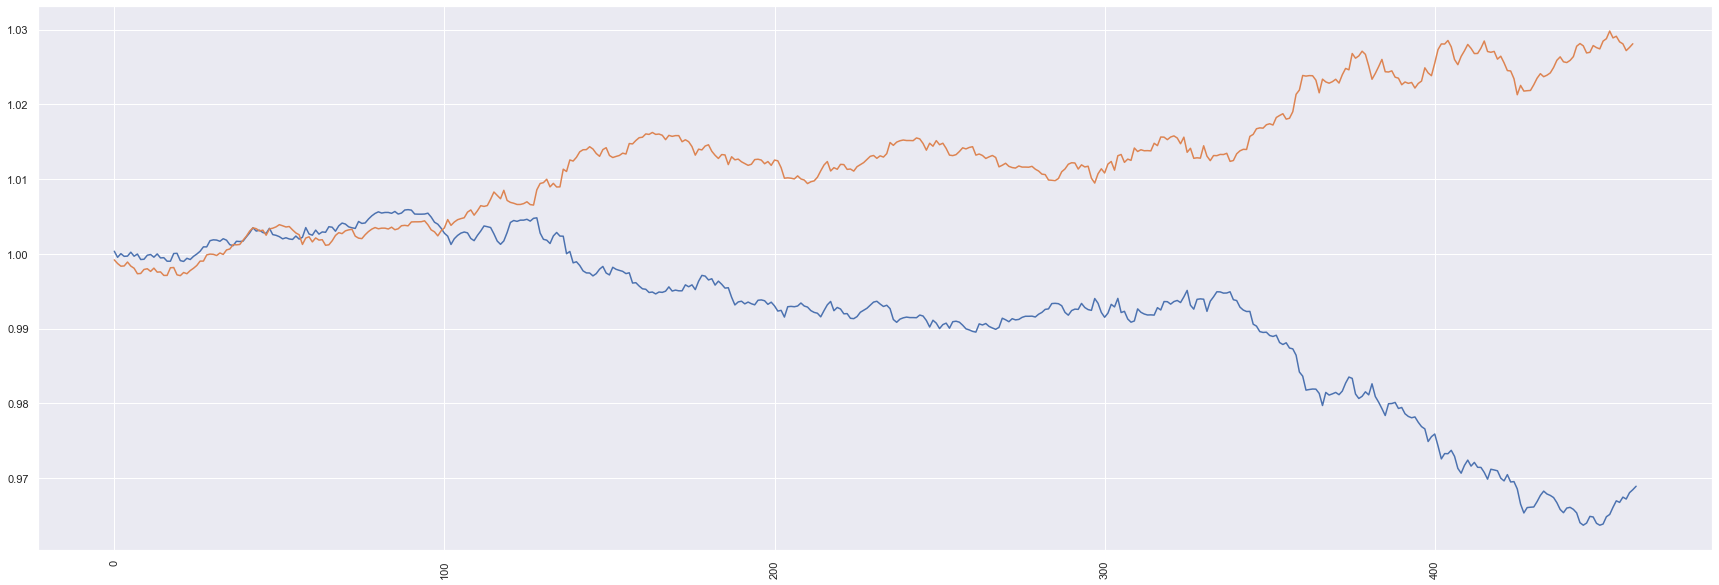

In [22]:
plt.plot(np.exp(df3['market_returns'].dropna().astype('float64')).cumprod(), label='Buy/Hold')
plt.plot(np.exp(df3['result'].dropna().astype('float64')).cumprod(), label='Strategy')
plt.xticks(rotation=90)

In [23]:
initial_capital = float(100000.0)

# Create df positions
positions = pd.DataFrame(index=df2.time.index).fillna(0.0)


# Buy 2 BTC
positions['BTC-PERP'] = 2*df['position']

# Initilize portfolio w value owned
portfolio = positions.multiply(df['close'], axis=0)

# Store diff in shares owned
pos_diff = positions.diff()

# Add 'holdings' to portfolio
portfolio['holdings'] = (positions.multiply(df['close'], axis=0)).sum(axis=1)

# Add 'cash' to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['close'], axis=0)).sum(axis=1).cumsum()

# Add 'total' to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add 'returns' to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

portfolio['time'] = df['time']
portfolio

,BTC-PERP,holdings,cash,total,returns,time
102,-122956.0,-122956.0,100000.0,-22956.0,NaN,2021-10-30
103,-122986.0,-122986.0,100000.0,-22986.0,0.001307,2021-10-30
104,-123028.0,-123028.0,100000.0,-23028.0,0.001827,2021-10-30
105,-122978.0,-122978.0,100000.0,-22978.0,-0.002171,2021-10-30
106,-123120.0,-123120.0,100000.0,-23120.0,0.006180,2021-10-30
...,...,...,...,...,...,...
1495,-121274.0,-121274.0,100260.0,-21014.0,0.001621,2021-10-31
1496,-121208.0,-121208.0,100260.0,-20948.0,-0.003141,2021-10-31
1497,-121266.0,-121266.0,100260.0,-21006.0,0.002769,2021-10-31
1498,-121334.0,-121334.0,100260.0,-21074.0,0.003237,2021-10-31
